### Entanglements and Schmidt Decomposition

In [1]:
import numpy as np
import scipy as sp
from ED_Functions import Hamiltonian_TFIM_open,lanczos,vec_norm

import time

import matplotlib.pyplot as plt
from ipywidgets import interact, FloatText, Button, HBox, VBox, Layout, FloatSlider, IntSlider

In [2]:
#TESTING CODE
#N = 8
#J,g = 1,0.5
#
#H,diag,offdiag,krylovSpace = lanczos(Hamiltonian_TFIM_open(J,g,N,return_basis=False),L = 20,return_basis=True)
##gs,gs_vec = sp.sparse.linalg.eigsh(H,k = 1,which = 'SA')
##psi = krylovSpace @ gs_vec
##print(gs)
#
#
#gs2, gs_vec2 = sp.linalg.eigh_tridiagonal(diag,offdiag)
#psi2 = krylovSpace @ gs_vec2[:,0]
#psi2 = psi2/vec_norm(psi2)
#print(gs2[0])
#
#
#
#
##gst,gst_vec =sp.sparse.linalg.eigsh(Hamiltonian_TFIM_open(J,g,N,return_basis=False),k = 1,which='SA')
##print("TRUE:",gst)
#
##plt.plot(np.arange(0,len(psi)), psi**2,label = 'fake')
#plt.plot(np.arange(0,len(psi2)), psi2**2,label = 'fake2')
##plt.plot(np.arange(0,len(psi2)), gst_vec**2,alpha = 0.5,label = 'real')
#plt.ylim(0,1.05)
#plt.legend()

(np.float64(-7.051599317271895),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]))

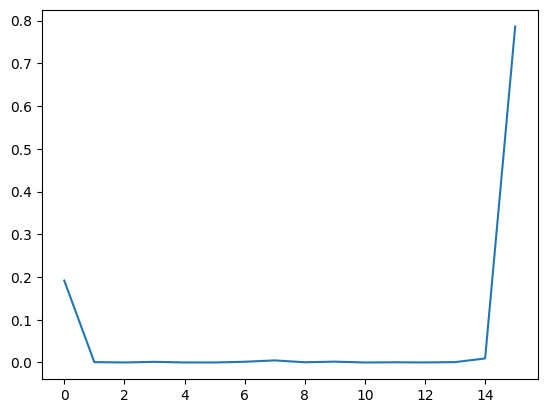

In [3]:
N = 4
J,g = 2,0.5

H,basis = Hamiltonian_TFIM_open(J,g,N,return_basis=True)
T,diag,offdiag,krylovSpace = lanczos(H,L = 20,return_basis=True)

gs, gs_vec = sp.linalg.eigh_tridiagonal(diag,offdiag)
psi = krylovSpace @ gs_vec[:,0]
psi = psi/vec_norm(psi)

plt.plot(psi**2)
gs[0],basis

In [4]:
gs[0],psi.shape,2**N

(np.float64(-7.051599317271895), (16,), 16)

In [5]:
D = int(2**(N/2))
psiLR = psi.reshape(D,D)
L = basis[:N//2 + 1]
R = basis[N//2 + 1:]

U,S,Vh = sp.linalg.svd(psiLR)
-sum(S*np.log(S))

np.float64(0.7479037286984271)

In [6]:
def entEntropy(x):
    x = x**2
    return -sum(x*np.log(x))
    
def groundState_Krylov(J,g,N,L):
    
    H,basis = Hamiltonian_TFIM_open(J,g,N,return_basis=True)
    T,diag,offdiag,krylovSpace = lanczos(H,L = L,return_basis=True)

    gs, gs_vec = sp.linalg.eigh_tridiagonal(diag,offdiag)
    psi = krylovSpace @ gs_vec[:,0]
    psi = psi/vec_norm(psi)

    return psi
    
def schmidtDecom(psi):
    
    D = int(2**(np.log2(len(psi))/2))
    psiLR = psi.reshape(D,D)

    U,S,Vh = sp.linalg.svd(psiLR)

    return entEntropy(S),(U,S,Vh)

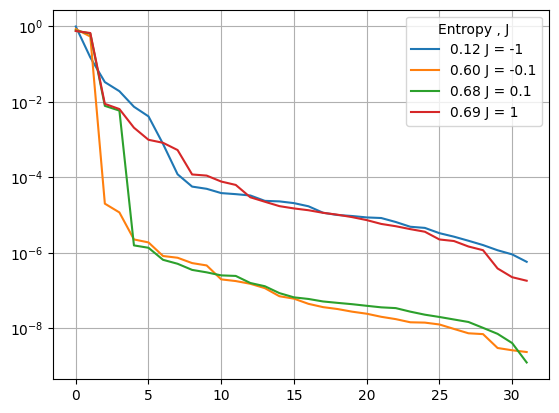

In [7]:
J = [-1,-0.1,0.1,1]

fig = plt.figure()
for j in J:
    x = schmidtDecom(groundState_Krylov(-j,0,10,200))
    plt.semilogy(x[1][1],'-',label = f'{x[0]:.2f} J = {j}')
plt.legend(title = "Entropy , J")
plt.grid()
plt.show()

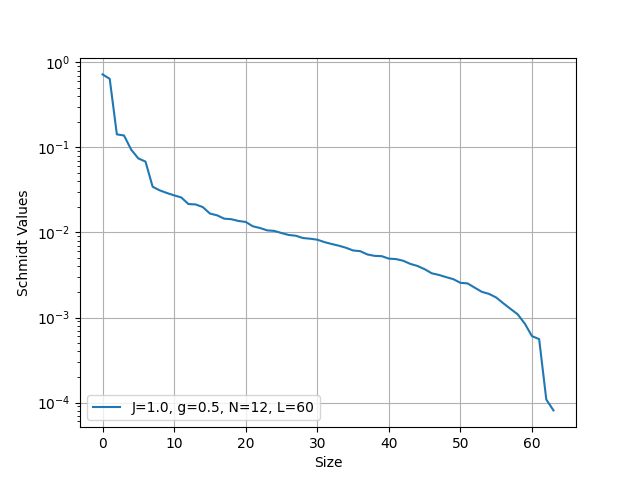

In [10]:
%matplotlib widget

rng = np.random.default_rng(102)

# Persistent figure
fig, ax = plt.subplots()
ax.set_title("")
ax.set_xlabel("Size")
ax.set_ylabel("Schmidt Values")
ax.grid()
#ax.legend()
#plt.show()

# Input widgets
J_input = FloatSlider(
    value=1.0, min=-5, max=5, step=0.5,
    description="J:"
)

g_input = FloatSlider(
    value=0.5, min=-5, max=5, step=0.5,
    description="g:"
)

N_input = IntSlider(
    value=12, min=2, max=16, step=2,
    description="Sites:"
)

L_input = IntSlider(
    value=60, min=20, max=200, step=10,
    description="Lanczos Itr:"
)


add_button = Button(description="Add Curve", )

# Callback: compute A -> B and plot
def add_curve(btn):
    
    J = J_input.value
    g = g_input.value
    N = N_input.value
    L = L_input.value
    
    
    psi = groundState_Krylov(J,g,N,L)
    
    #psi = rng.random((2**N,1))
    #psi = psi/vec_norm(psi)

    x = schmidtDecom(psi)
    
    # Add curve to the existing axes without clearing
    ax.semilogy(x[1][1], '-', label=f"J={J}, g={g}, N={N}, L={L}")
    ax.legend(loc='lower left')

add_button.on_click(add_curve)
clear_button = Button(description="Clear")
clear_button.on_click(lambda x: [l.remove() for l in ax.get_lines()])
# Display UI
display(VBox([HBox([J_input, g_input,add_button]),HBox([N_input, L_input,clear_button]), ]))

add_button.click()
plt.show();

In [11]:
plt.close('all')